In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as mh

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import scipy.optimize as opt
from scipy.odr import *
#from astropy import table

font=24
style='normal'

In [5]:
diff = np.genfromtxt('eeufspac_same_epoch_only_spectra.qdp', skip_header=3)  #eeufs

a = np.argwhere(np.isnan(diff[:,0]))
a = a.flatten()

diff = np.vsplit(diff,a)
diff_Mar2020 = diff[0]
diff_Mar2020b = diff[1][1:]
diff_Apr2020 = diff[2][1:]
diff_Apr2020b = diff[3][1:]
diff_Sep2020 = diff[4][1:]
diff_Sep2020b = diff[5][1:]
diff_Oct2020 = diff[6][1:]

resdiff_Mar2020 = diff[7][1:]
resdiff_Mar2020b = diff[8][1:]
resdiff_Apr2020 = diff[9][1:]
resdiff_Apr2020b = diff[10][1:]
resdiff_Sep2020 = diff[11][1:]
resdiff_Sep2020b = diff[12][1:]
resdiff_Oct2020 = diff[13][1:]


In [6]:
#t = table.read(example_qdp, format='eeufspac_same_epoch_only_spectra.qdp', table_id=1, names=['a', 'b', 'c', 'd'])


In [9]:
print(diff)

[array([[1.57906997e+00, 1.54579997e-01, 1.57879495e-05, 1.78414177e-06,
        8.55452981e-06, 1.31525496e-06, 7.03817341e-06, 2.01101500e-07],
       [1.84013498e+00, 1.06485009e-01, 8.34613384e-05, 8.85277950e-06,
        6.96721399e-05, 1.06239040e-05, 5.75960185e-05, 1.45222111e-06],
       [2.02622008e+00, 7.96000957e-02, 1.81639305e-04, 1.92665593e-05,
        2.04339711e-04, 3.09035786e-05, 1.69514329e-04, 3.92180345e-06],
       [2.16564512e+00, 5.98249435e-02, 3.33886419e-04, 3.38958489e-05,
        4.09555767e-04, 6.15321624e-05, 3.40544328e-04, 7.47928971e-06],
       [2.26788998e+00, 4.24200296e-02, 6.57683297e-04, 6.77852950e-05,
        6.26248075e-04, 9.36033248e-05, 5.21561946e-04, 1.10827568e-05],
       [2.35275507e+00, 4.24449444e-02, 8.18261818e-04, 8.51626537e-05,
        8.50578304e-04, 1.26560422e-04, 7.09306740e-04, 1.47110950e-05],
       [2.42516994e+00, 2.99699306e-02, 1.30196323e-03, 1.31498527e-04,
        1.07441342e-03, 1.59238378e-04, 8.96910089e-04, 1

In [11]:
print(diff_Mar2020)

[[1.57906997e+00 1.54579997e-01 1.57879495e-05 1.78414177e-06
  8.55452981e-06 1.31525496e-06 7.03817341e-06 2.01101500e-07]
 [1.84013498e+00 1.06485009e-01 8.34613384e-05 8.85277950e-06
  6.96721399e-05 1.06239040e-05 5.75960185e-05 1.45222111e-06]
 [2.02622008e+00 7.96000957e-02 1.81639305e-04 1.92665593e-05
  2.04339711e-04 3.09035786e-05 1.69514329e-04 3.92180345e-06]
 [2.16564512e+00 5.98249435e-02 3.33886419e-04 3.38958489e-05
  4.09555767e-04 6.15321624e-05 3.40544328e-04 7.47928971e-06]
 [2.26788998e+00 4.24200296e-02 6.57683297e-04 6.77852950e-05
  6.26248075e-04 9.36033248e-05 5.21561946e-04 1.10827568e-05]
 [2.35275507e+00 4.24449444e-02 8.18261818e-04 8.51626537e-05
  8.50578304e-04 1.26560422e-04 7.09306740e-04 1.47110950e-05]
 [2.42516994e+00 2.99699306e-02 1.30196323e-03 1.31498527e-04
  1.07441342e-03 1.59238378e-04 8.96910089e-04 1.82649401e-05]
 [2.49261999e+00 3.74801159e-02 1.09775597e-03 1.10164081e-04
  1.19452912e-03 1.76389542e-04 9.98113421e-04 2.00260820e-05]


In [12]:
print(resdiff_Mar2020)

[[ 1.57906997  0.15458     4.05428553  1.                 nan         nan
          nan         nan]
 [ 1.84013498  0.10648501  1.5576117   1.                 nan         nan
          nan         nan]
 [ 2.02622008  0.0796001  -1.1782285   1.                 nan         nan
          nan         nan]
 [ 2.16564512  0.05982494 -2.23240829  1.                 nan         nan
          nan         nan]
 [ 2.26788998  0.04242003  0.46374762  1.                 nan         nan
          nan         nan]
 [ 2.35275507  0.04244494 -0.37946785  1.                 nan         nan
          nan         nan]
 [ 2.42516994  0.02996993  1.73043621  1.                 nan         nan
          nan         nan]
 [ 2.49261999  0.03748012 -0.87844533  1.                 nan         nan
          nan         nan]
 [ 2.56258512  0.03248501 -0.31173059  1.                 nan         nan
          nan         nan]
 [ 2.62256002  0.02749002 -0.36689785  1.                 nan         nan
          nan    

/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_30426/2648897769.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  up.xaxis.set_ticklabels(['','','','','','','','',r'','','',r'',''],minor=True)
/var/folders/s9/66hwj2fn2gq55dpk69y4vmgr0000gn/T/ipykernel_30426/2648897769.py:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)


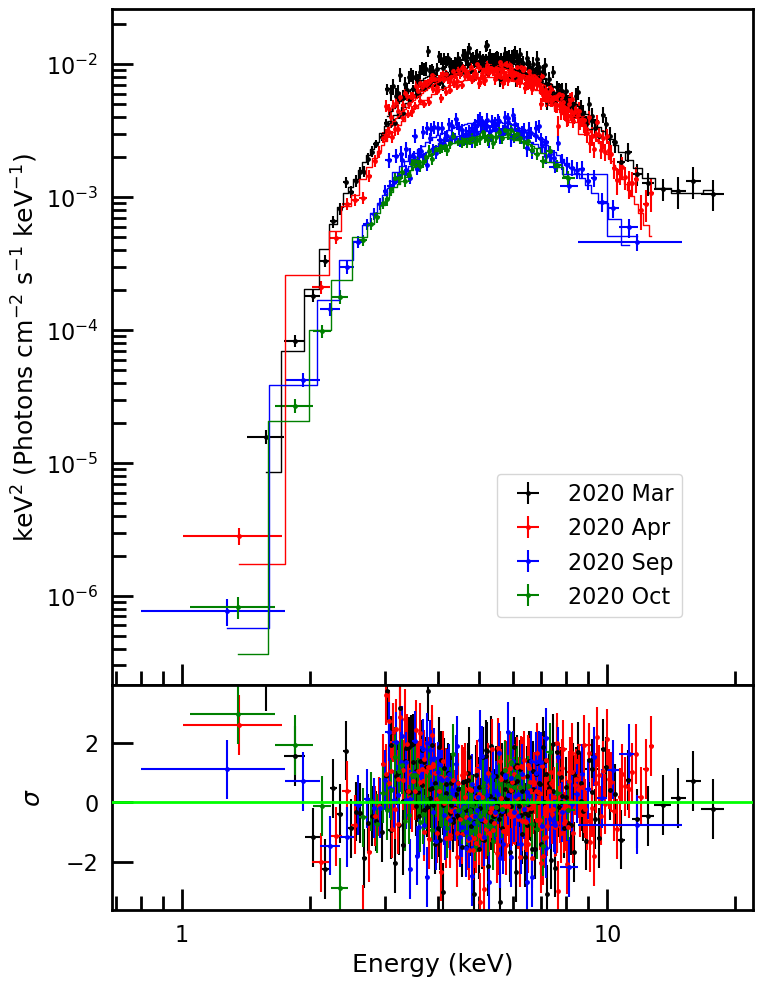

In [10]:
f1 = plt.figure(figsize=(8.27,11.69))  #a4

gs = gridspec.GridSpec(200,200) 
gs.update(wspace=0,hspace=0)# top=1.1)

up =  plt.subplot(gs[:150,:200])
up.errorbar(diff_Mar2020[:,0], diff_Mar2020[:,2], xerr=diff_Mar2020[:,1], yerr=diff_Mar2020[:,3], 
             fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='black',label = '2020 Mar')
up.errorbar(diff_Mar2020[:,0], diff_Mar2020[:,4], color= 'k', lw=1, drawstyle = 'steps-mid') 

up.errorbar(diff_Mar2020b[:,0], diff_Mar2020b[:,2], xerr=diff_Mar2020b[:,1], yerr=diff_Mar2020b[:,3], 
             fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='k')
up.errorbar(diff_Mar2020b[:,0], diff_Mar2020b[:,4], color= 'k', lw=1, drawstyle = 'steps-mid') 



up.errorbar(diff_Apr2020[:,0], diff_Apr2020[:,2], xerr=diff_Apr2020[:,1], yerr=diff_Apr2020[:,3], 
             fmt = '.', fillstyle = 'none', mec='r', mew = 2, ms=3, color='r',label = '2020 Apr')
up.errorbar(diff_Apr2020[:,0], diff_Apr2020[:,4], color= 'r', lw=1, drawstyle = 'steps-mid') 

up.errorbar(diff_Apr2020b[:,0], diff_Apr2020b[:,2], xerr=diff_Apr2020b[:,1], yerr=diff_Apr2020b[:,3], 
             fmt = '.', fillstyle = 'none', mec='r', mew = 2, ms=3, color='r')
up.errorbar(diff_Apr2020b[:,0], diff_Apr2020b[:,4], color= 'r', lw=1, drawstyle = 'steps-mid') 



up.errorbar(diff_Sep2020[:,0], diff_Sep2020[:,2], xerr=diff_Sep2020[:,1], yerr=diff_Sep2020[:,3], 
             fmt = '.', fillstyle = 'none', mec='b', mew = 2, ms=3, color='b',label = '2020 Sep')
up.errorbar(diff_Sep2020[:,0], diff_Sep2020[:,4], color= 'b', lw=1, drawstyle = 'steps-mid') 

up.errorbar(diff_Sep2020b[:,0], diff_Sep2020b[:,2], xerr=diff_Sep2020b[:,1], yerr=diff_Sep2020b[:,3], 
             fmt = '.', fillstyle = 'none', mec='b', mew = 2, ms=3, color='b')
up.errorbar(diff_Sep2020b[:,0], diff_Sep2020b[:,4], color= 'b', lw=1, drawstyle = 'steps-mid') 



up.errorbar(diff_Oct2020[:,0], diff_Oct2020[:,2], xerr=diff_Oct2020[:,1], yerr=diff_Oct2020[:,3], 
             fmt = '.', fillstyle = 'none', mec='g', mew = 2, ms=3, color='g',label = '2020 Oct')
up.errorbar(diff_Oct2020[:,0], diff_Oct2020[:,4], color= 'g', lw=1, drawstyle = 'steps-mid') 

up.set_yscale('log')
up.set_xscale('log')

up.xaxis.set_visible(True)
#up.tick_params(axis='x', which='both',labelbottom='off')
up.xaxis.set_ticklabels(['','','','','','','','',r'','','',r'',''],minor=True)

up.set_ylabel('keV$^2$ (Photons cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=18, fontweight=style)#, labelpad=23)
up.legend(loc=[0.6,0.1], fontsize=16) 

below = plt.subplot(gs[150:200,:200])

below.axhline(y = 0, color = 'lime', lw = 2, zorder=10)

below.errorbar(resdiff_Mar2020[:,0], resdiff_Mar2020[:,2], xerr=resdiff_Mar2020[:,1], 
    yerr=resdiff_Mar2020[:,3], fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='k')

below.errorbar(resdiff_Mar2020b[:,0], resdiff_Mar2020b[:,2], xerr=resdiff_Mar2020b[:,1], 
    yerr=resdiff_Mar2020b[:,3], fmt = '.', fillstyle = 'none', mec='k', mew = 2, ms=3, color='k')



below.errorbar(resdiff_Apr2020[:,0], resdiff_Apr2020[:,2], xerr=resdiff_Apr2020[:,1], 
    yerr=resdiff_Apr2020[:,3], fmt = '.', fillstyle = 'none', mec='r', mew = 2, ms=3, color='r')

below.errorbar(resdiff_Apr2020b[:,0], resdiff_Apr2020b[:,2], xerr=resdiff_Apr2020b[:,1], 
    yerr=resdiff_Apr2020b[:,3], fmt = '.', fillstyle = 'none', mec='r', mew = 2, ms=3, color='r')



below.errorbar(resdiff_Sep2020[:,0], resdiff_Sep2020[:,2], xerr=resdiff_Sep2020[:,1], 
    yerr=resdiff_Sep2020[:,3], fmt = '.', fillstyle = 'none', mec='b', mew = 2, ms=3, color='b')

below.errorbar(resdiff_Sep2020b[:,0], resdiff_Sep2020b[:,2], xerr=resdiff_Sep2020b[:,1], 
    yerr=resdiff_Sep2020b[:,3], fmt = '.', fillstyle = 'none', mec='b', mew = 2, ms=3, color='b')



below.errorbar(resdiff_Oct2020[:,0], resdiff_Oct2020[:,2], xerr=resdiff_Oct2020[:,1], 
    yerr=resdiff_Oct2020[:,3], fmt = '.', fillstyle = 'none', mec='g', mew = 2, ms=3, color='g')



below.set_xscale('log')
below.set_ylim([-3.6,3.95])

below.set_ylabel( '$\sigma$', fontsize = 18, fontweight=style, labelpad=15)
below.set_xlabel('Energy (keV)', fontsize = 18, fontweight=style)

below.xaxis.set_ticklabels(['','',r'1',r'10'], minor=False)

for axis in [up,below]:
	axis.tick_params(which='major', width=2,length=15,labelsize=16,pad=10,direction='in')
	axis.tick_params(which='minor', width=2,length=10,labelsize=16,pad=10,direction='in')
	
	for ax in ['top','bottom','left','right']:
    		axis.spines[ax].set_linewidth(2)

plt.savefig('eeufspac_spectra_SWJ1818.pdf', bbox_inches = 'tight')
plt.show()